### 1. Data Preprocessing

In [319]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.random.set_seed(777)

In [320]:
# downloading the MNIST data from keras dataset packages
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [321]:

# training data
print(x_train.shape, y_train.shape)
print(y_train)

print('\n')

# test data
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]


(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


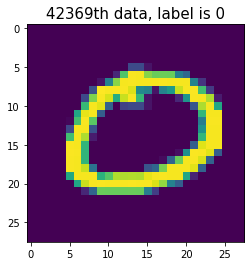

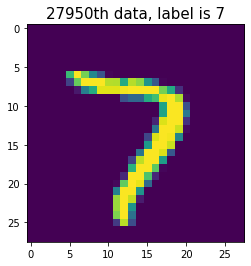

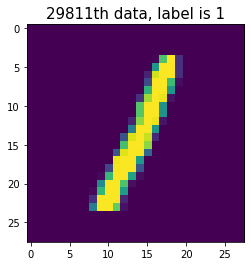

In [322]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(546)

sample_size = 3
# 0~59999의 범위에서 무작위로 3개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size = sample_size) 

for idx in random_idx:
    img = x_train[idx, :]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title('%dth data, label is %d' % (idx,label), fontsize = 15)

In [323]:

num_x_train = x_train.shape[0]
num_x_test = x_test.shape[0]

# input preprocessing

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)



In [324]:
print(x_train.shape)

(60000, 28, 28, 1)


In [325]:
# One-hot encoding about labels

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)



In [326]:
print(y_train.shape)

(60000, 10)


### 2. CNN Model declaration

In [328]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 5, strides = 1, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

### 3. Loss Function and Optim function declarations

In [329]:

# delaration loss function
@tf.function
def cross_entropy_loss(logits, y):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

# delaration optimizer function
optimizer = tf.optimizers.Adam(1e-4)

# delaration optimizing steps in CNN
@tf.function
def train_step(model, x, y):
    with tf.GradientTape() as tape:
        y_pred, logits = model(x)
        loss = cross_entropy_loss(logits, y)
    gradients = tape.gradient(loss, model.trainable_variables) # trainable gradient using
    optimizer.apply_gradients(zip(gradients, model.trainable_variables)) #to use updated trainable gradients in model

# declaration of computing accuracy
@tf.function
def compute_accuracy(y_pred, y):
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy


### 4. model learning execution

In [330]:

model.compile(optimizer= 'adam',
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

In [331]:
epochs = 50
batch_size = 300

history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split= 0.3)

Epoch 1/50


2022-11-08 14:21:47.508263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


140/140 [==============================] - ETA: 0s - loss: 0.2395 - accuracy: 0.9269

2022-11-08 14:21:52.967728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


140/140 [==============================] - 7s 44ms/step - loss: 0.2395 - accuracy: 0.9269 - val_loss: 0.0781 - val_accuracy: 0.9763
Epoch 2/50
140/140 [==============================] - 6s 42ms/step - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.0517 - val_accuracy: 0.9852
Epoch 3/50
140/140 [==============================] - 6s 42ms/step - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.0510 - val_accuracy: 0.9854
Epoch 4/50
140/140 [==============================] - 6s 46ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.0470 - val_accuracy: 0.9864
Epoch 5/50
140/140 [==============================] - 6s 45ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.0408 - val_accuracy: 0.9883
Epoch 6/50
140/140 [==============================] - 6s 43ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.0412 - val_accuracy: 0.9881
Epoch 7/50
140/140 [==============================] - 6s 44ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0494 - val_accuracy: 0.9874
Epoch 8/50

In [332]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 5. model result plotting

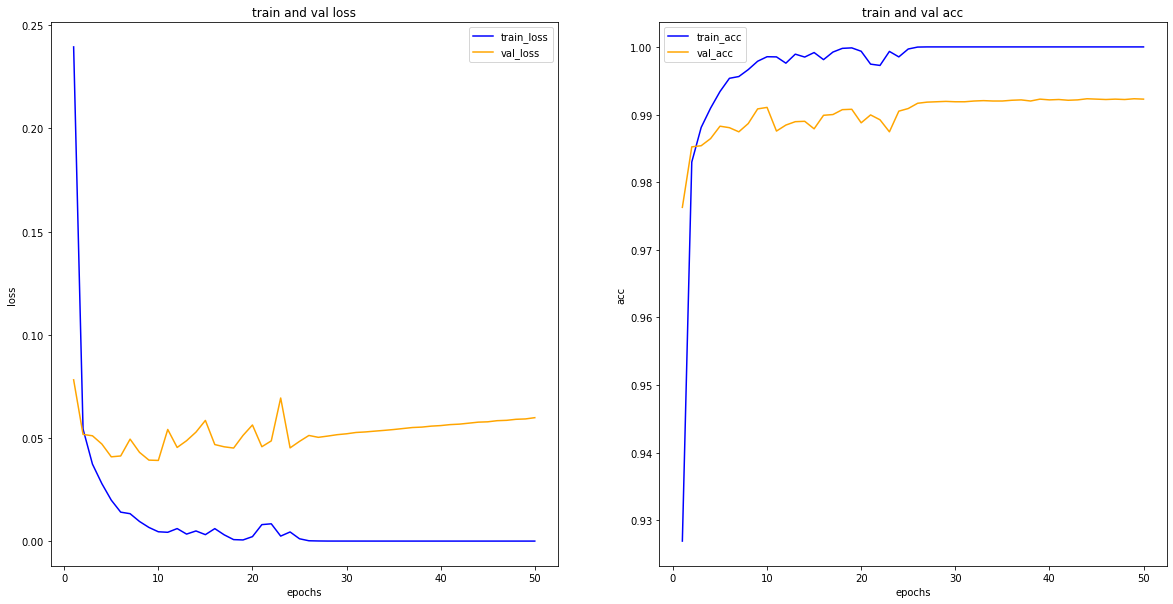

In [334]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (20, 10))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()


### 6. Evaluate model

In [335]:
model.evaluate(x_test, y_test)

  1/313 [..............................] - ETA: 1:01 - loss: 8.0564e-07 - accuracy: 1.0000

2022-11-08 14:27:57.592883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 9ms/step - loss: 0.0353 - accuracy: 0.9940


[0.03525146469473839, 0.9940000176429749]

In [342]:
import numpy as np
np.set_printoptions(precision=7) # numpy set precisions

results = model.predict(x_test)

print(results.shape)

print(f'각 클래스에 속할 확률 : \n{results[0]}')

(10000, 10)
각 클래스에 속할 확률 : 
[6.5232067e-25 3.4694840e-22 5.1075992e-21 1.1828889e-18 8.0093024e-30
 2.4225926e-24 1.7455004e-34 1.0000000e+00 2.6605202e-23 5.6960324e-16]


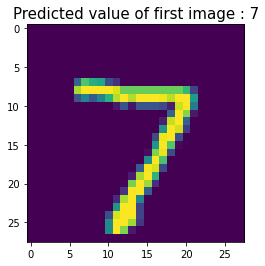

In [343]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of first image : ' + str(arg_results[0]), fontsize = 15)
plt.show()

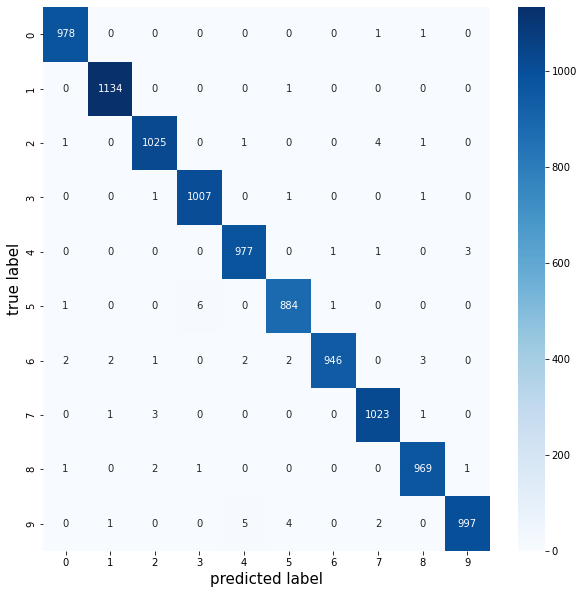

In [344]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (10, 10))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()

In [345]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [346]:
import h5py as h5
model.save("mnist_detection_cnn.h5")